In [1]:
from gensim.models import Word2Vec


### Training a Model

In [2]:
import nltk
from nltk.tokenize import word_tokenize

# Certifique-se de baixar os recursos necessários
nltk.download('punkt')

# Carregar documento (arquivo .txt)
with open("harry.txt", "r", encoding="utf-8") as file:
    texto = file.read()

# Tokenizar em palavras
tokens = word_tokenize(texto)

frases = [
    [token.lower() for token in word_tokenize(a, language='portuguese') if token.isalpha()]
    for a in tokens
]


model = Word2Vec(frases, vector_size=100, window=5, min_count=1, sg=1, epochs=5, workers=3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afons\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
model.wv['harry']

array([ 8.13227147e-03, -4.45733406e-03, -1.06835726e-03,  1.00636482e-03,
       -1.91113955e-04,  1.14817743e-03,  6.11386076e-03, -2.02715401e-05,
       -3.24596534e-03, -1.51072862e-03,  5.89729892e-03,  1.51410222e-03,
       -7.24261976e-04,  9.33324732e-03, -4.92128357e-03, -8.38409644e-04,
        9.17541143e-03,  6.74942741e-03,  1.50285603e-03, -8.88256077e-03,
        1.14874600e-03, -2.28825561e-03,  9.36823711e-03,  1.20992784e-03,
        1.49006362e-03,  2.40640994e-03, -1.83600665e-03, -4.99963388e-03,
        2.32429506e-04, -2.01418041e-03,  6.60093315e-03,  8.94012302e-03,
       -6.74754381e-04,  2.97701475e-03, -6.10765442e-03,  1.69932481e-03,
       -6.92623248e-03, -8.69402662e-03, -5.90020278e-03, -8.95647518e-03,
        7.27759488e-03, -5.77203138e-03,  8.27635173e-03, -7.24354526e-03,
        3.42167495e-03,  9.67499893e-03, -7.78544787e-03, -9.94505733e-03,
       -4.32914635e-03, -2.68313056e-03, -2.71289347e-04, -8.83155130e-03,
       -8.61755759e-03,  

In [5]:
model.wv['grifinória']

array([-0.0019781 , -0.00512878, -0.00848262, -0.00933627,  0.00442576,
       -0.00407519, -0.00689355, -0.00696301,  0.00804544,  0.0063004 ,
       -0.00284796,  0.00518261, -0.00547868, -0.0045904 ,  0.00827028,
        0.00114884, -0.00579253, -0.00470833, -0.00791713, -0.00959249,
       -0.0021894 , -0.00239661,  0.00970897,  0.00341825,  0.0001704 ,
        0.00174087,  0.00530035,  0.00122602, -0.00304675, -0.00148255,
       -0.00287602,  0.00569477,  0.00984764,  0.00911304, -0.00898564,
       -0.00841337, -0.00809315, -0.00771189, -0.00537813,  0.00419876,
       -0.00413859,  0.00550548, -0.00876529, -0.00013436,  0.00353144,
       -0.00732962,  0.0027319 , -0.0033172 ,  0.00703803, -0.0006104 ,
        0.00232043,  0.00310825,  0.0066849 , -0.0027381 ,  0.00693651,
        0.00016126, -0.0079024 ,  0.00479127,  0.00308561,  0.00377618,
        0.00285828, -0.00480761, -0.00748512, -0.0058806 ,  0.00611539,
        0.00148324, -0.00368521,  0.00707765,  0.00079998,  0.00

In [6]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")

In [9]:
get_word('afonso')

The word 'afonso' does not appear in this model


In [8]:
get_word("magia")

array([-2.0898485e-03,  2.5167596e-03, -6.5352913e-05, -9.2732646e-03,
        2.2932268e-03,  2.8377378e-03, -9.5900726e-03, -7.5547528e-03,
       -6.9180486e-04,  1.4589560e-03,  5.3985142e-03,  4.8334133e-03,
        5.7598879e-03, -1.9482375e-04, -9.3017975e-03, -1.2751103e-03,
       -3.7758660e-03,  7.1182717e-03, -9.3127228e-03,  4.2655538e-03,
        5.1486683e-03, -2.5907338e-03, -8.1144162e-03, -2.8553330e-03,
        3.2379841e-03, -5.8835540e-03, -3.4128011e-03, -4.4290102e-03,
        8.4934710e-04,  1.0684371e-03,  9.5153094e-04,  6.6824676e-03,
        2.4713695e-03, -7.0168092e-03,  2.2382557e-03,  5.2646864e-03,
       -9.4445432e-03,  1.7349541e-03,  1.3853669e-04, -7.9045901e-03,
        3.7407398e-04, -7.3703001e-03,  2.6617420e-03, -7.1025668e-03,
        5.7034921e-03, -2.2988773e-03,  6.4162374e-03,  1.8033409e-03,
       -3.2540048e-03,  3.1949722e-03,  9.7505413e-03, -3.6221540e-03,
        5.2789570e-04, -4.7199763e-03, -7.6550175e-03,  8.7572467e-03,
      

### Online training / Resuming training

In [ ]:
more_sentences = [
    ['Advanced', 'users', 'can', 'load', 'a', 'model',
     'and', 'continue', 'training', 'it', 'with', 'more', 'sentences',"ds"],
]

model.build_vocab(more_sentences, update=True)
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)
get_word("Advanced")

array([-5.9370755e-04,  7.1822582e-03,  1.7649996e-03,  4.5411601e-03,
        9.5819198e-03,  3.0257618e-03, -4.8137070e-03,  6.1930027e-03,
       -7.4438751e-03,  1.7332244e-03,  8.2859723e-03,  7.1978974e-03,
        4.9795303e-03, -2.2547840e-04, -4.1529690e-03,  7.3746801e-04,
       -3.7769258e-03, -4.2686691e-03,  4.0435172e-03,  1.5289235e-03,
       -8.8926302e-03, -3.5421026e-03, -7.3105060e-03, -8.0938283e-03,
        3.0619383e-04,  8.6722017e-04,  1.0805845e-03, -2.9570521e-03,
       -3.0914403e-03, -3.6282944e-03, -4.5300005e-03,  3.5227775e-03,
       -6.6005886e-03,  1.3128936e-03,  7.3790131e-03, -1.6463829e-03,
        1.6476476e-03, -9.1144564e-03,  8.6036613e-03, -4.9116169e-03,
       -4.5924988e-03, -3.5714782e-03, -4.5773626e-04,  6.8103839e-03,
        1.7607546e-03,  5.2599609e-03, -3.2474136e-03,  9.3284240e-03,
       -2.9401076e-03, -4.6931780e-03,  6.6999234e-03,  7.3493626e-03,
       -5.3003835e-03,  6.4324155e-03,  2.7440430e-04,  2.1190203e-03,
      

### Vocabulary Length

In [11]:
len(model.wv)

8082

In [12]:
model.wv.index_to_key

['de',
 'que',
 'a',
 'e',
 'o',
 'não',
 'harry',
 'para',
 'um',
 'se',
 'uma',
 'com',
 'os',
 'em',
 'do',
 'ele',
 'é',
 'no',
 'da',
 'mas',
 'você',
 'na',
 'disse',
 'por',
 'as',
 'rony',
 'estava',
 'mais',
 'hagrid',
 'como',
 'era',
 'quando',
 'muito',
 'hermione',
 'ao',
 'à',
 'eu',
 'coisa',
 'eles',
 'está',
 'foi',
 'dos',
 'sua',
 'me',
 'seu',
 'ela',
 'tinha',
 'bem',
 'snape',
 'isso',
 'dumbledore',
 'das',
 'ter',
 'vai',
 'vez',
 'duda',
 'cabeça',
 'então',
 'já',
 'até',
 'agora',
 'vocês',
 'olhos',
 'nada',
 'havia',
 'só',
 'parecia',
 'alguma',
 'todos',
 'sem',
 'perguntou',
 'porta',
 'ser',
 'neville',
 'tio',
 'nem',
 'lhe',
 'válter',
 'tão',
 'quirrell',
 'pelo',
 'fazer',
 'nunca',
 'dizer',
 'dois',
 'porque',
 'nos',
 'potter',
 'mesmo',
 'dursley',
 'depois',
 'vamos',
 'grifinória',
 'pela',
 'tem',
 'lado',
 'aqui',
 'estavam',
 'fora',
 'grande',
 'tinham',
 'tempo',
 'dele',
 'casa',
 'lá',
 'quem',
 'quase',
 'seus',
 'ou',
 'enquanto',
 'a

### Saving and coding

In [14]:
model.save("models/word2vec.model")

model = Word2Vec.load("models/word2vec.model")

In [15]:
# Store just the words + their trained embeddings.

from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("models/word2vec.wordvectors")

wv = KeyedVectors.load("models/word2vec.wordvectors")
vector = wv['potter'] 
print(vector)

[-4.0219510e-03  2.5012803e-03  1.5762186e-03 -9.3019018e-03
  8.3375918e-03  6.2749218e-03 -8.0951191e-03  6.0441648e-03
  2.7692639e-03  9.2479109e-04  3.3334554e-03 -9.4855810e-03
 -9.1542362e-04  3.9283480e-03  6.1185528e-03 -2.4784387e-03
  9.5068738e-03 -8.6343251e-03  2.3642302e-04 -3.7554514e-03
  3.3738506e-03 -2.1102012e-03  2.3925901e-04 -7.5467657e-03
  1.8785703e-03  8.9504151e-03  6.5362011e-03 -1.4791716e-03
 -9.6886288e-03  6.2005650e-03  3.2557130e-03  1.9509185e-03
 -8.5015902e-03 -2.3660182e-03 -6.7272712e-03  2.5284768e-04
 -4.6229241e-03  1.2223244e-04  8.6036073e-03 -2.4220706e-03
 -2.0106875e-03 -7.7417209e-03  4.4395640e-03  6.7255567e-03
  5.0390922e-03  6.0476064e-05 -3.2835947e-03  9.3799827e-05
  7.0721782e-03 -9.8983292e-04 -8.8804141e-03 -1.6048837e-03
  6.7557869e-03  8.3400402e-03 -8.9933202e-03  8.4675550e-03
 -4.2207348e-03  4.7812737e-03  8.5638044e-04 -9.0574613e-03
  7.4956752e-03 -2.3010909e-03 -9.0977224e-03  3.7408054e-03
  7.1615684e-03  1.03691

In [16]:
word_vectors.save_word2vec_format('models/vectors.txt', binary=False)
word_vectors.save_word2vec_format('models/vectors.bin', binary=True)

In [17]:
model_txt = KeyedVectors.load_word2vec_format('models/vectors.txt', binary=False)
model_bin = KeyedVectors.load_word2vec_format('models/vectors.bin', binary=True)

### Available Models

In [18]:
import gensim.downloader
# Show all available models in gensim-data
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [27]:
# Download the "glove-twitter-25" embeddings
model_wv = Word2Vec.load("models/word2vec.model")
#model_wv = gensim.downloader.load('word2vec-google-news-300')

In [28]:
model.wv.save_word2vec_format('model_harry.txt', binary=False)

### Similarity

In [32]:
model_wv.wv.most_similar('leviosa')

[('fantochinho', 0.3471190333366394),
 ('substituindo', 0.3336864113807678),
 ('precisaremos', 0.3290361762046814),
 ('formos', 0.32050657272338867),
 ('mundo', 0.31179478764533997),
 ('dias', 0.3085697889328003),
 ('chorando', 0.30578887462615967),
 ('perto', 0.30517101287841797),
 ('poderes', 0.29699182510375977),
 ('acidentara', 0.2967570424079895)]

In [33]:
model_wv.wv.most_similar('hagrid')

[('edwiges', 0.3439558148384094),
 ('espalhar', 0.33714985847473145),
 ('piscaram', 0.3369746208190918),
 ('desengonçado', 0.3322811424732208),
 ('apanhando', 0.32884615659713745),
 ('meia', 0.3226913511753082),
 ('chapinhava', 0.31663644313812256),
 ('harry', 0.3039996922016144),
 ('training', 0.291799932718277),
 ('rouba', 0.29159069061279297)]

In [46]:
print(model_wv.wv.similarity("harry","voldemort"))
print(model_wv.wv.similarity("filosofal","harry"))
print(model_wv.wv.similarity("hagrid","hermione"))
print(model_wv.wv.similarity("harry","snape"))



0.13185275
0.12981871
0.035221413
-0.0152964955


In [51]:
pairs = [
    ('harry', 'voldemort'),   
    ('snape', 'draco'),
    ('hermione', 'varinha'),
    ('hermione', 'rony'),
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model_wv.wv.similarity(w1, w2)))

harry 	 voldemort 	 0.13
snape 	 draco 	 0.10
hermione 	 varinha 	 0.11
hermione 	 rony 	 0.03


### Intruso - Which one is the odd one out in this list?

In [53]:
model_wv.wv.doesnt_match(["harry","rony","hermione"])

'hermione'

In [55]:
model_wv.wv.doesnt_match(["magia","dumbledore","snape"])

'snape'

In [60]:
model_wv.wv.doesnt_match(["draco","harry","hermione","rony"])

'draco'

### Analogies

In [63]:
result = model_wv.wv.most_similar(positive=['harry', 'potter'])
print(result[0])

('amaluca', 0.3707946836948395)


In [65]:
result = model_wv.wv.most_similar(positive=['professora', 'dumbledore'], negative=['homem'])
print(result[0])

('perdêla', 0.3721899092197418)


In [67]:
model_wv.wv.most_similar("rony", topn=15)

[('apanhar', 0.36571019887924194),
 ('circo', 0.3544086515903473),
 ('rugia', 0.31918439269065857),
 ('tropeços', 0.3169378638267517),
 ('diretamente', 0.30209898948669434),
 ('corram', 0.2992129921913147),
 ('riam', 0.2952122390270233),
 ('surrey', 0.28741419315338135),
 ('cutucando', 0.28716665506362915),
 ('estufou', 0.28481218218803406),
 ('entortando', 0.2794898748397827),
 ('cultivar', 0.2779781222343445),
 ('compravam', 0.277554988861084),
 ('saí', 0.2770320177078247),
 ('defendermos', 0.2760849595069885)]

In [68]:
def analogy( x2, y1, x1):
    result = model_wv.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [71]:
analogy('harry', 'rony', 'hagrid')

'seguidores'

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None):
    word_vectors = []
    valid_words = []

    for w in words:
        if w in model:
            word_vectors.append(model[w])
            valid_words.append(w)
        else:
            print(f"Aviso: '{w}' não está no vocabulário do modelo.")

    word_vectors = np.array(word_vectors)
    twodim = PCA(n_components=2).fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='skyblue', s=100)

    for word, (x, y) in zip(valid_words, twodim):
        plt.text(x, y, word, fontsize=12, ha='left', va='bottom')

    plt.title("Palavras no espaço PCA (2D)", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



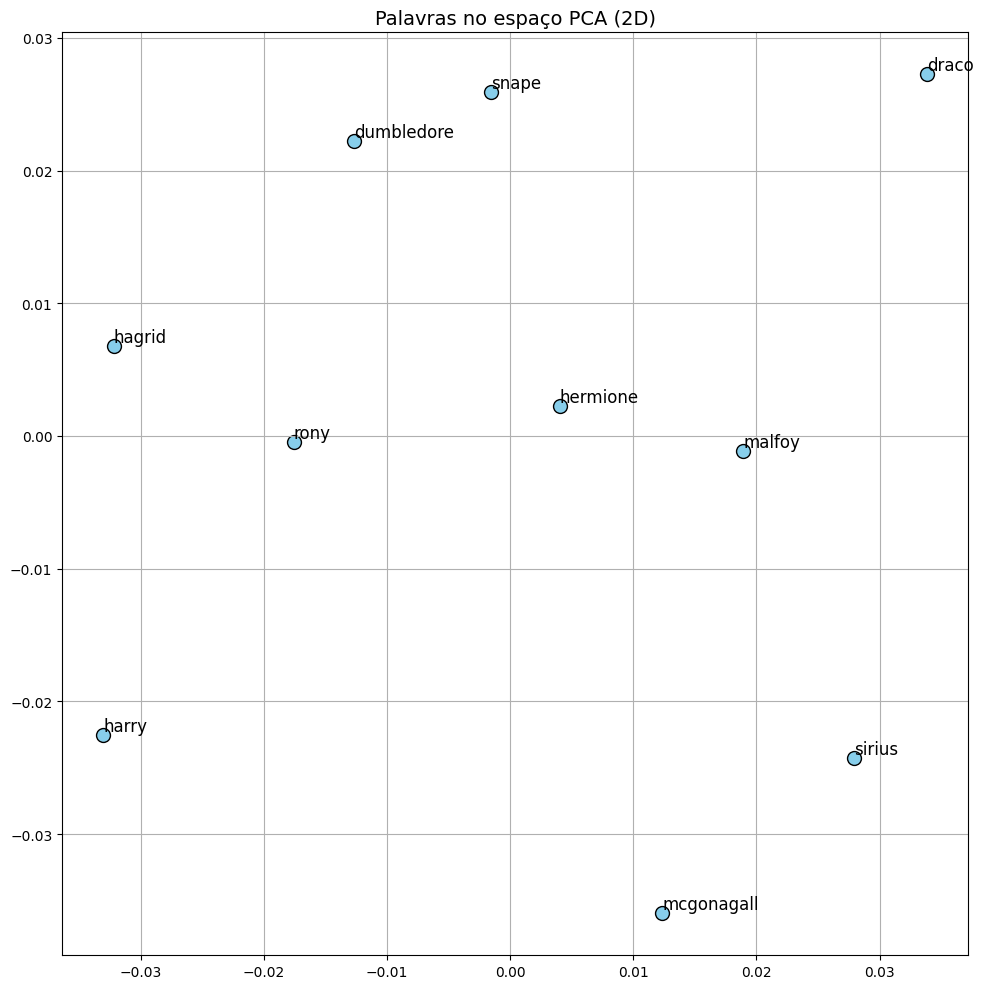

In [109]:
palavras =  ['sirius','draco','malfoy', 'snape', 'mcgonagall','harry', 'rony', 'hermione', 'dumbledore','hagrid']
display_pca_scatterplot(model_wv.wv,palavras)

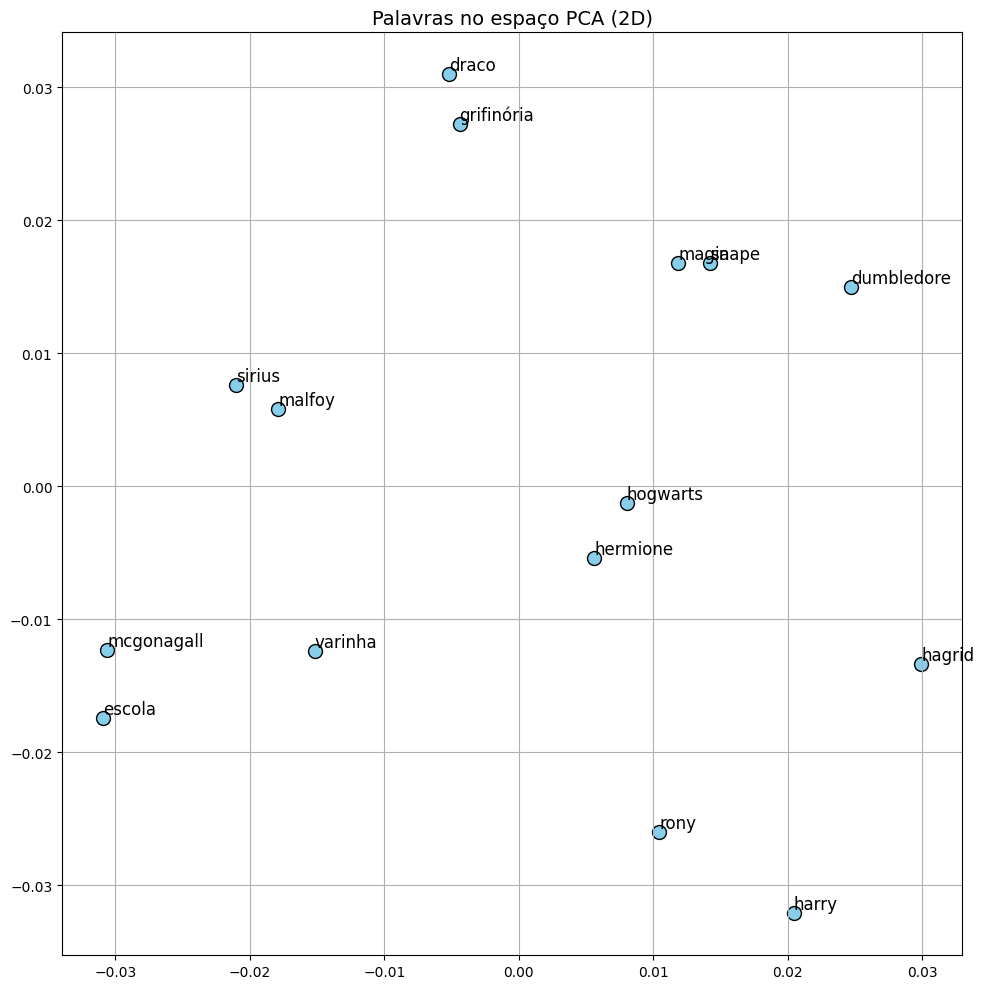

In [110]:
palavras2 =  ['hogwarts','escola','varinha','magia','grifinória','sirius','draco','malfoy', 'snape', 'mcgonagall','harry', 'rony', 'hermione', 'dumbledore','hagrid']
display_pca_scatterplot(model_wv.wv,palavras2)

In [104]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def display_closestwords_tsnescatterplot(model, words):
    arr = np.empty((0, model.vector_size), dtype='f')

    for word in words:
        if word in model.wv:
            wrd_vector = model.wv[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        else:
            print(f"'{word}' não encontrado no vocabulário do modelo.")

    tsne = TSNE(n_components=2, perplexity=10, n_iter=5000, random_state=42)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


c:\Users\afons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


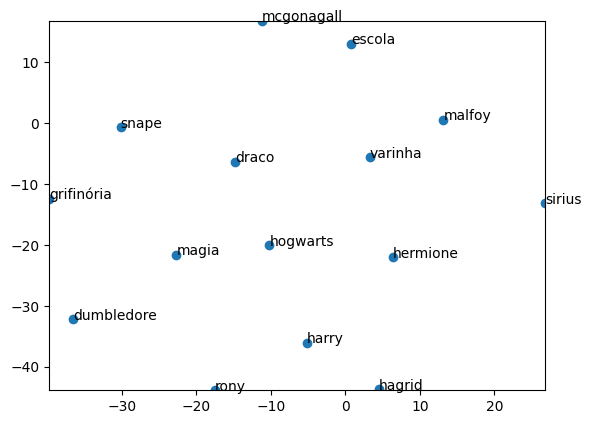

In [105]:
display_closestwords_tsnescatterplot(model_wv, palavras2)

#python -m gensim.scripts.word2vec2tensor --input model_harry.txt --output model_harry 
#https://projector.tensorflow.org